<a href="https://colab.research.google.com/github/Brunocs1991/google_colaboratory/blob/main/YOLO_V4_Detec%C3%A7%C3%A3o_de_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [1]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import zipfile
from google.colab.patches import cv2_imshow

## Etapa 2 - Conectando com o Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/data/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
labels_path = os.path.sep.join(['./cfg', 'coco.names'])
labels_path

'./cfg/coco.names'

In [5]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
len(LABELS)

80

In [7]:
weights_path = os.path.sep.join(['.', 'yolov4.weights'])
config_path = os.path.sep.join(['cfg','yolov4.cfg'])
weights_path, config_path

('./yolov4.weights', 'cfg/yolov4.cfg')

In [8]:
net = cv2.dnn.readNet(config_path, weights_path)
net

< cv2.dnn.Net 0x78c5deda2ed0>

## Etapa 4 - Definindo mais configurações para detecção

In [9]:
COLORS =np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[ 20 107 232]
 [173  61 110]
 [130 119  61]
 [149 102  73]
 [197  89 247]
 [228   9 147]
 [155 203 132]
 [ 82 161  85]
 [217 122 233]
 [245  89 247]
 [225  47 194]
 [114 136 112]
 [ 58 141 130]
 [172  59 142]
 [212 248 191]
 [250  82  74]
 [165 240 149]
 [175  30 130]
 [140 223 106]
 [  6 174 129]
 [137  68  90]
 [101 253  18]
 [110 227 125]
 [ 14 240  82]
 [ 98 168 156]
 [180  37  90]
 [ 25  12 169]
 [ 99  74 161]
 [  8  52  18]
 [118  28 219]
 [ 94  25  95]
 [ 15  43 154]
 [ 61  75 188]
 [ 36 185  19]
 [ 31 172  58]
 [ 83 155 102]
 [ 40 209 140]
 [ 84  47  35]
 [107  91 191]
 [168 182  39]
 [ 37 149 238]
 [ 40 124 149]
 [194   7  73]
 [ 71 235  60]
 [204  50 146]
 [148 161  41]
 [ 75 100 215]
 [170  65 163]
 [218 163 186]
 [164  86 243]
 [ 34 103 149]
 [ 51 101  42]
 [134  55  28]
 [125  34 214]
 [ 93 185 196]
 [196 156 201]
 [228 205 162]
 [253 141 165]
 [249  90 195]
 [ 26 111 193]
 [ 53 223   3]
 [ 11  80 137]
 [158  57  89]
 [236  86   2]
 [ 49  15 229]
 [199 108  14]
 [ 14 110 

In [10]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print(f'Total de camadas: {len(ln)}')

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [11]:
print ('Camadas de Saida')
print(net.getUnconnectedOutLayers())

Camadas de Saida
[327 353 379]


In [12]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [13]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

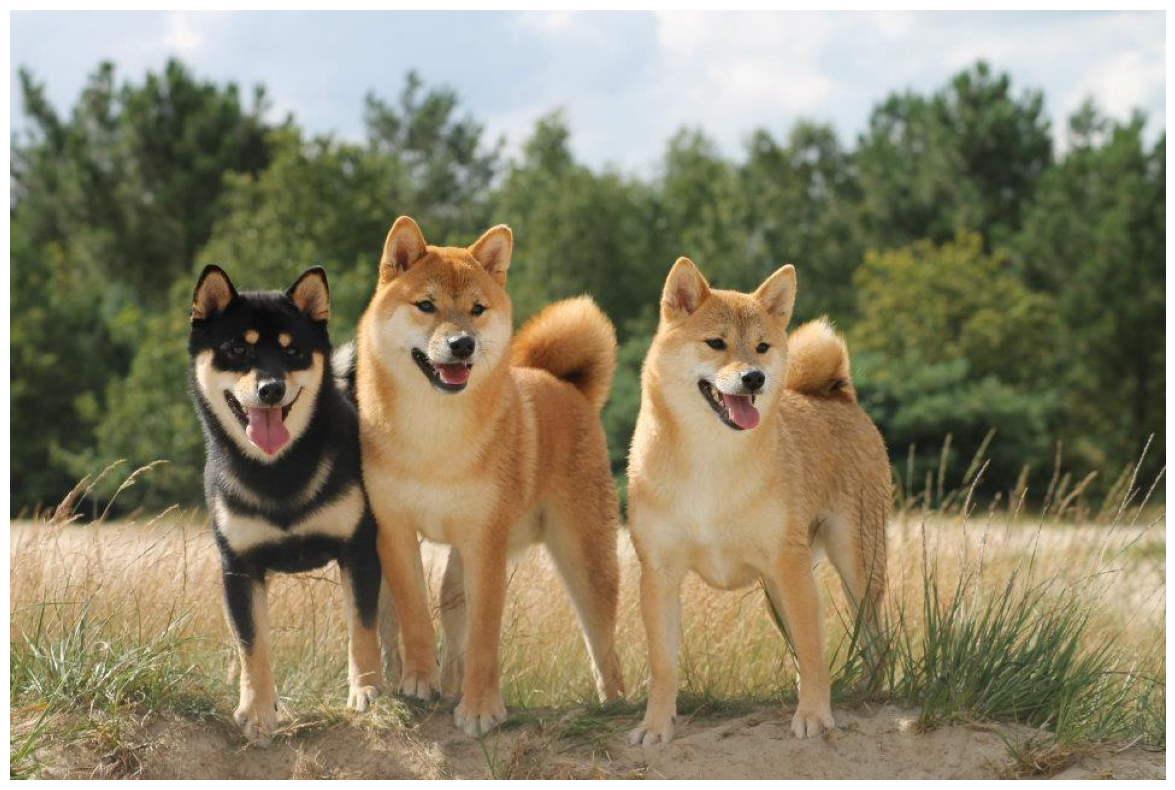

In [14]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/cachorros.jpg')
mostrar(imagem)

In [15]:
imagem_cp = imagem.copy()

In [16]:
(H, W) = imagem.shape[:2]
print(f'Altura: {H} \nLargura: {W}')

Altura: 640 
Largura: 960


In [17]:
inicio = time.time()
blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False)
net.setInput(blob)
layer_outputs = net.forward(ln)

termino = time.time()
print(f'YOLO levou {(termino-inicio):.2f} segundos')

YOLO levou 9.49 segundos


## Etapa 7 - Definindo as variáveis

In [18]:
threshold = 0.5
threshold_NMS = 0.3
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [19]:
layer_outputs[0], len(layer_outputs[0])

(array([[0.01100558, 0.01021743, 0.02264772, ..., 0.        , 0.        ,
         0.        ],
        [0.01492394, 0.01543288, 0.03303435, ..., 0.        , 0.        ,
         0.        ],
        [0.01701084, 0.01489796, 0.05110351, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.9842644 , 0.03099856, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.9859079 , 0.0597507 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 8112)

In [20]:
layer_outputs[1], len(layer_outputs[1])

(array([[0.03031929, 0.0320848 , 0.10433294, ..., 0.        , 0.        ,
         0.        ],
        [0.0329858 , 0.03253518, 0.13059318, ..., 0.        , 0.        ,
         0.        ],
        [0.0312387 , 0.03151371, 0.15157267, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96770096, 0.96682906, 0.06866277, ..., 0.        , 0.        ,
         0.        ],
        [0.96435654, 0.96775067, 0.09513659, ..., 0.        , 0.        ,
         0.        ],
        [0.9661032 , 0.9677124 , 0.10772248, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 2028)

In [21]:
layer_outputs[2], len(layer_outputs[2]), layer_outputs[2][0], len(layer_outputs[2][0])

(array([[0.06402372, 0.06951444, 0.15857781, ..., 0.        , 0.        ,
         0.        ],
        [0.0616472 , 0.05672149, 0.31426504, ..., 0.        , 0.        ,
         0.        ],
        [0.03240769, 0.0500917 , 0.7458859 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.2066342 , ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.29772216, ..., 0.        , 0.        ,
         0.        ],
        [0.9512335 , 0.95295554, 0.5208086 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 507,
 array([6.4023718e-02, 6.9514439e-02, 1.5857781e-01, 3.4840187e-01,
        4.2169395e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [22]:
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    classeID = np.argmax(scores)
    confianca = scores[classeID]
    if confianca > threshold:
      print(f'scores: {scores}')
      print(f'classe mais provável: {classeID}')
      print(f'confiança: {confianca}')

      caixa = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = caixa.astype('int')

      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      caixas.append([x,y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)


scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.6059549 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.       ]
classe mais provável: 16
confiança: 0.6059548854827881
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.9570457 0.        0.        0.        0.
 

In [23]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [24]:
print(confiancas), len(confiancas)

[0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283]


(None, 16)

In [25]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

## Etapa 9 - Aplicando a Non-Maxima Supression

In [26]:
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)
objs

array([ 7, 15, 11], dtype=int32)

In [27]:
for obj in objs:
  print(confiancas[obj])

0.9869317412376404
0.9824249744415283
0.9767161011695862


## Etapa 10 - Mostrando o resultado da detecção na imagem

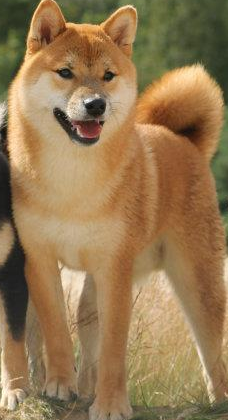

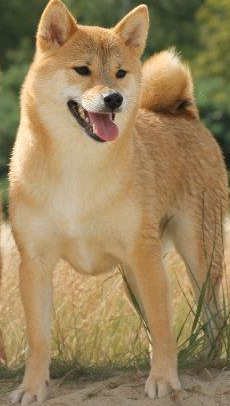

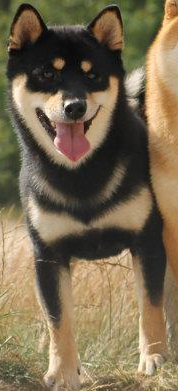

In [28]:
if len (objs) > 0:
  for i in objs.flatten():
    (x, y) =(caixas[i][0], caixas[i][1])
    (w, h) = (caixas[i][2], caixas[i][3])
    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)
    cor = [int(c) for c in COLORS[IDclasses[i]]]
    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)
    texto = f"{LABELS[IDclasses[i]]}: {(confiancas[i]):.4f}"
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

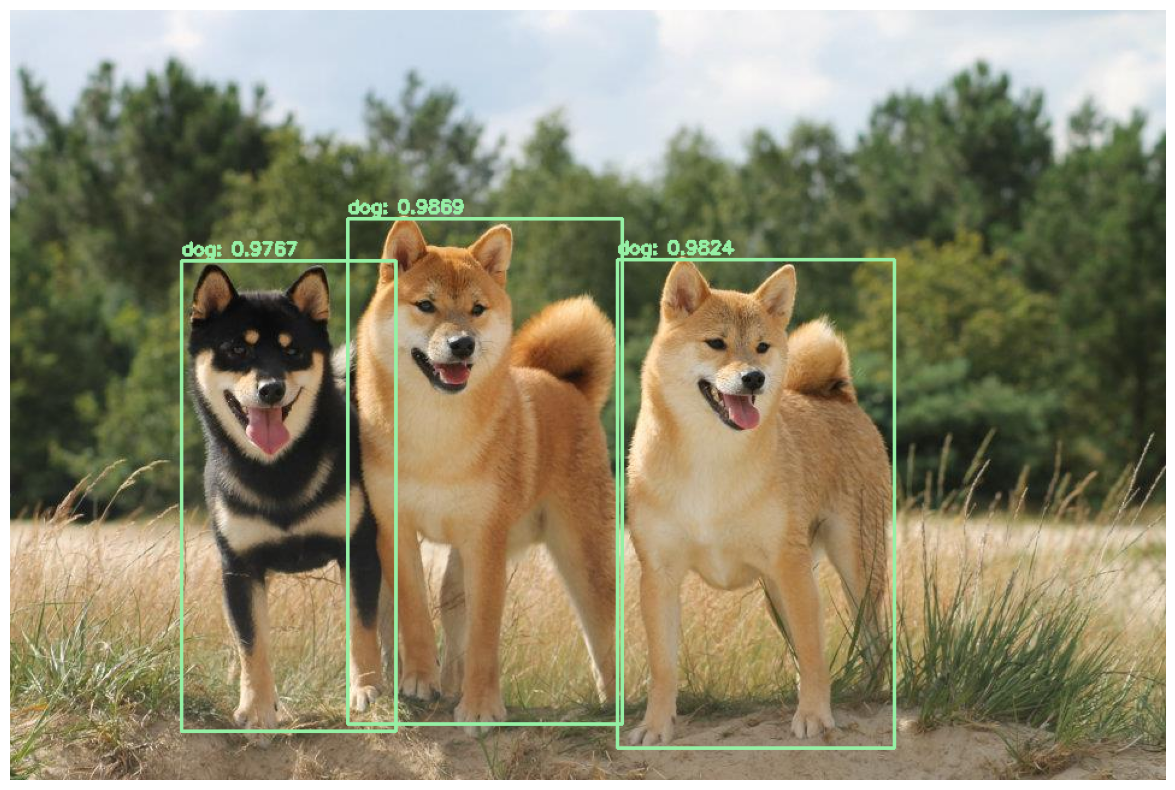

In [29]:
mostrar(imagem)

In [30]:
cv2.imwrite('cachorros_resultado.jpg', imagem)
!cp ./cachorros_resultado.jpg /content/drive/MyDrive/Colab\ Notebooks/data